# Wine Quality Project

### Introduction

This project details the steps taken to create a classifier for predicting the quality of a wine given a set of attributes from a particular sample. The algorithm implemented will be a support vector machine but we will explore the results of another type of model as well. Since the model will attempt to predict a quality score from 0-10 this will be considered a classifier although it could be easily adapted to be a regression model as well.

The goal of this project is to create a wine predictor that will allow people to input data that can be measured from the wine and determine the overall quality of a wine. Since taste can be a subjective measure, the quality score used in training were taken as the median score given by 3 different wine experts. People may have different opionions about the taste of a wine but one could use the quality score to set the cost of a wine and perhaps set it apart from other similar wines. Using this model could be a cheaper alternative to bringin in wine experts to judge a new batch.

### Data

The data was taken from the UCI Machine Learning Repositry Wine Quality Data Set (https://archive.ics.uci.edu/ml/datasets/Wine+Quality). The target attribute is the `quality` field and we will use feature selection to narrow down the other attributes. There are 6497 total wine samples, a detailed description of the data can be seen in the "winequality.names" file included in this project folder.

In [45]:
import pandas as pd
import numpy as np
import seaborn as sns

In [39]:
red = pd.read_csv('winequality-red.csv', delimiter=';')
print(red.dtypes)
red

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [44]:
white = pd.read_csv('winequality-white.csv', delimiter=';')
print(white.dtypes)
white

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


#### Data Cleaning

The data provided was already cleaned and did not require further cleaning.

In [26]:
print(f"Null Values: {red.isna().sum().sum() + white.isna().sum().sum()}")

Null Values: 0


#### Exploratory Data Analysis

In this section we will inspect the data and perform principle component analysis to reduce the number of features in our data.

We notice from the correlation matrix that the red wine has a high negative correlation between pH, fixed acidity, and citric acid. This is unsurprising since all of these are related to the acidic levels of the wine. There for we can drop two of these and just keep the pH.

<Axes: >

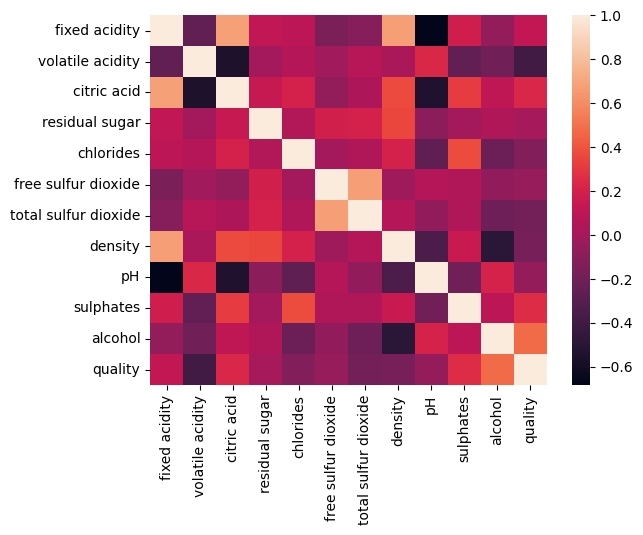

In [50]:
sns.heatmap(red.corr())

<Axes: >

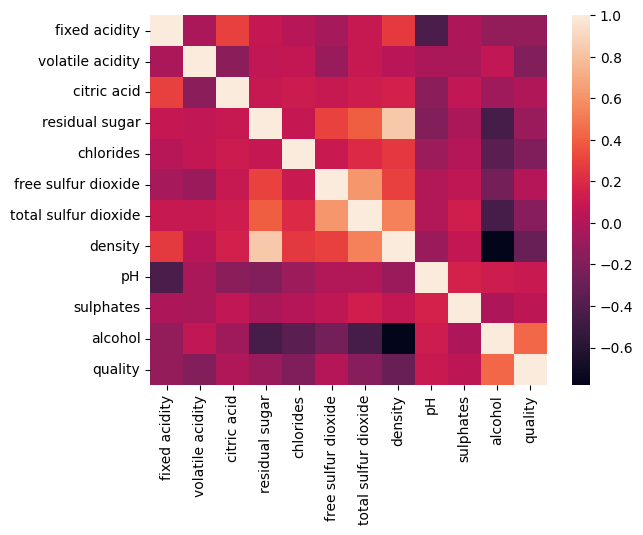

In [49]:
sns.heatmap(white.corr())

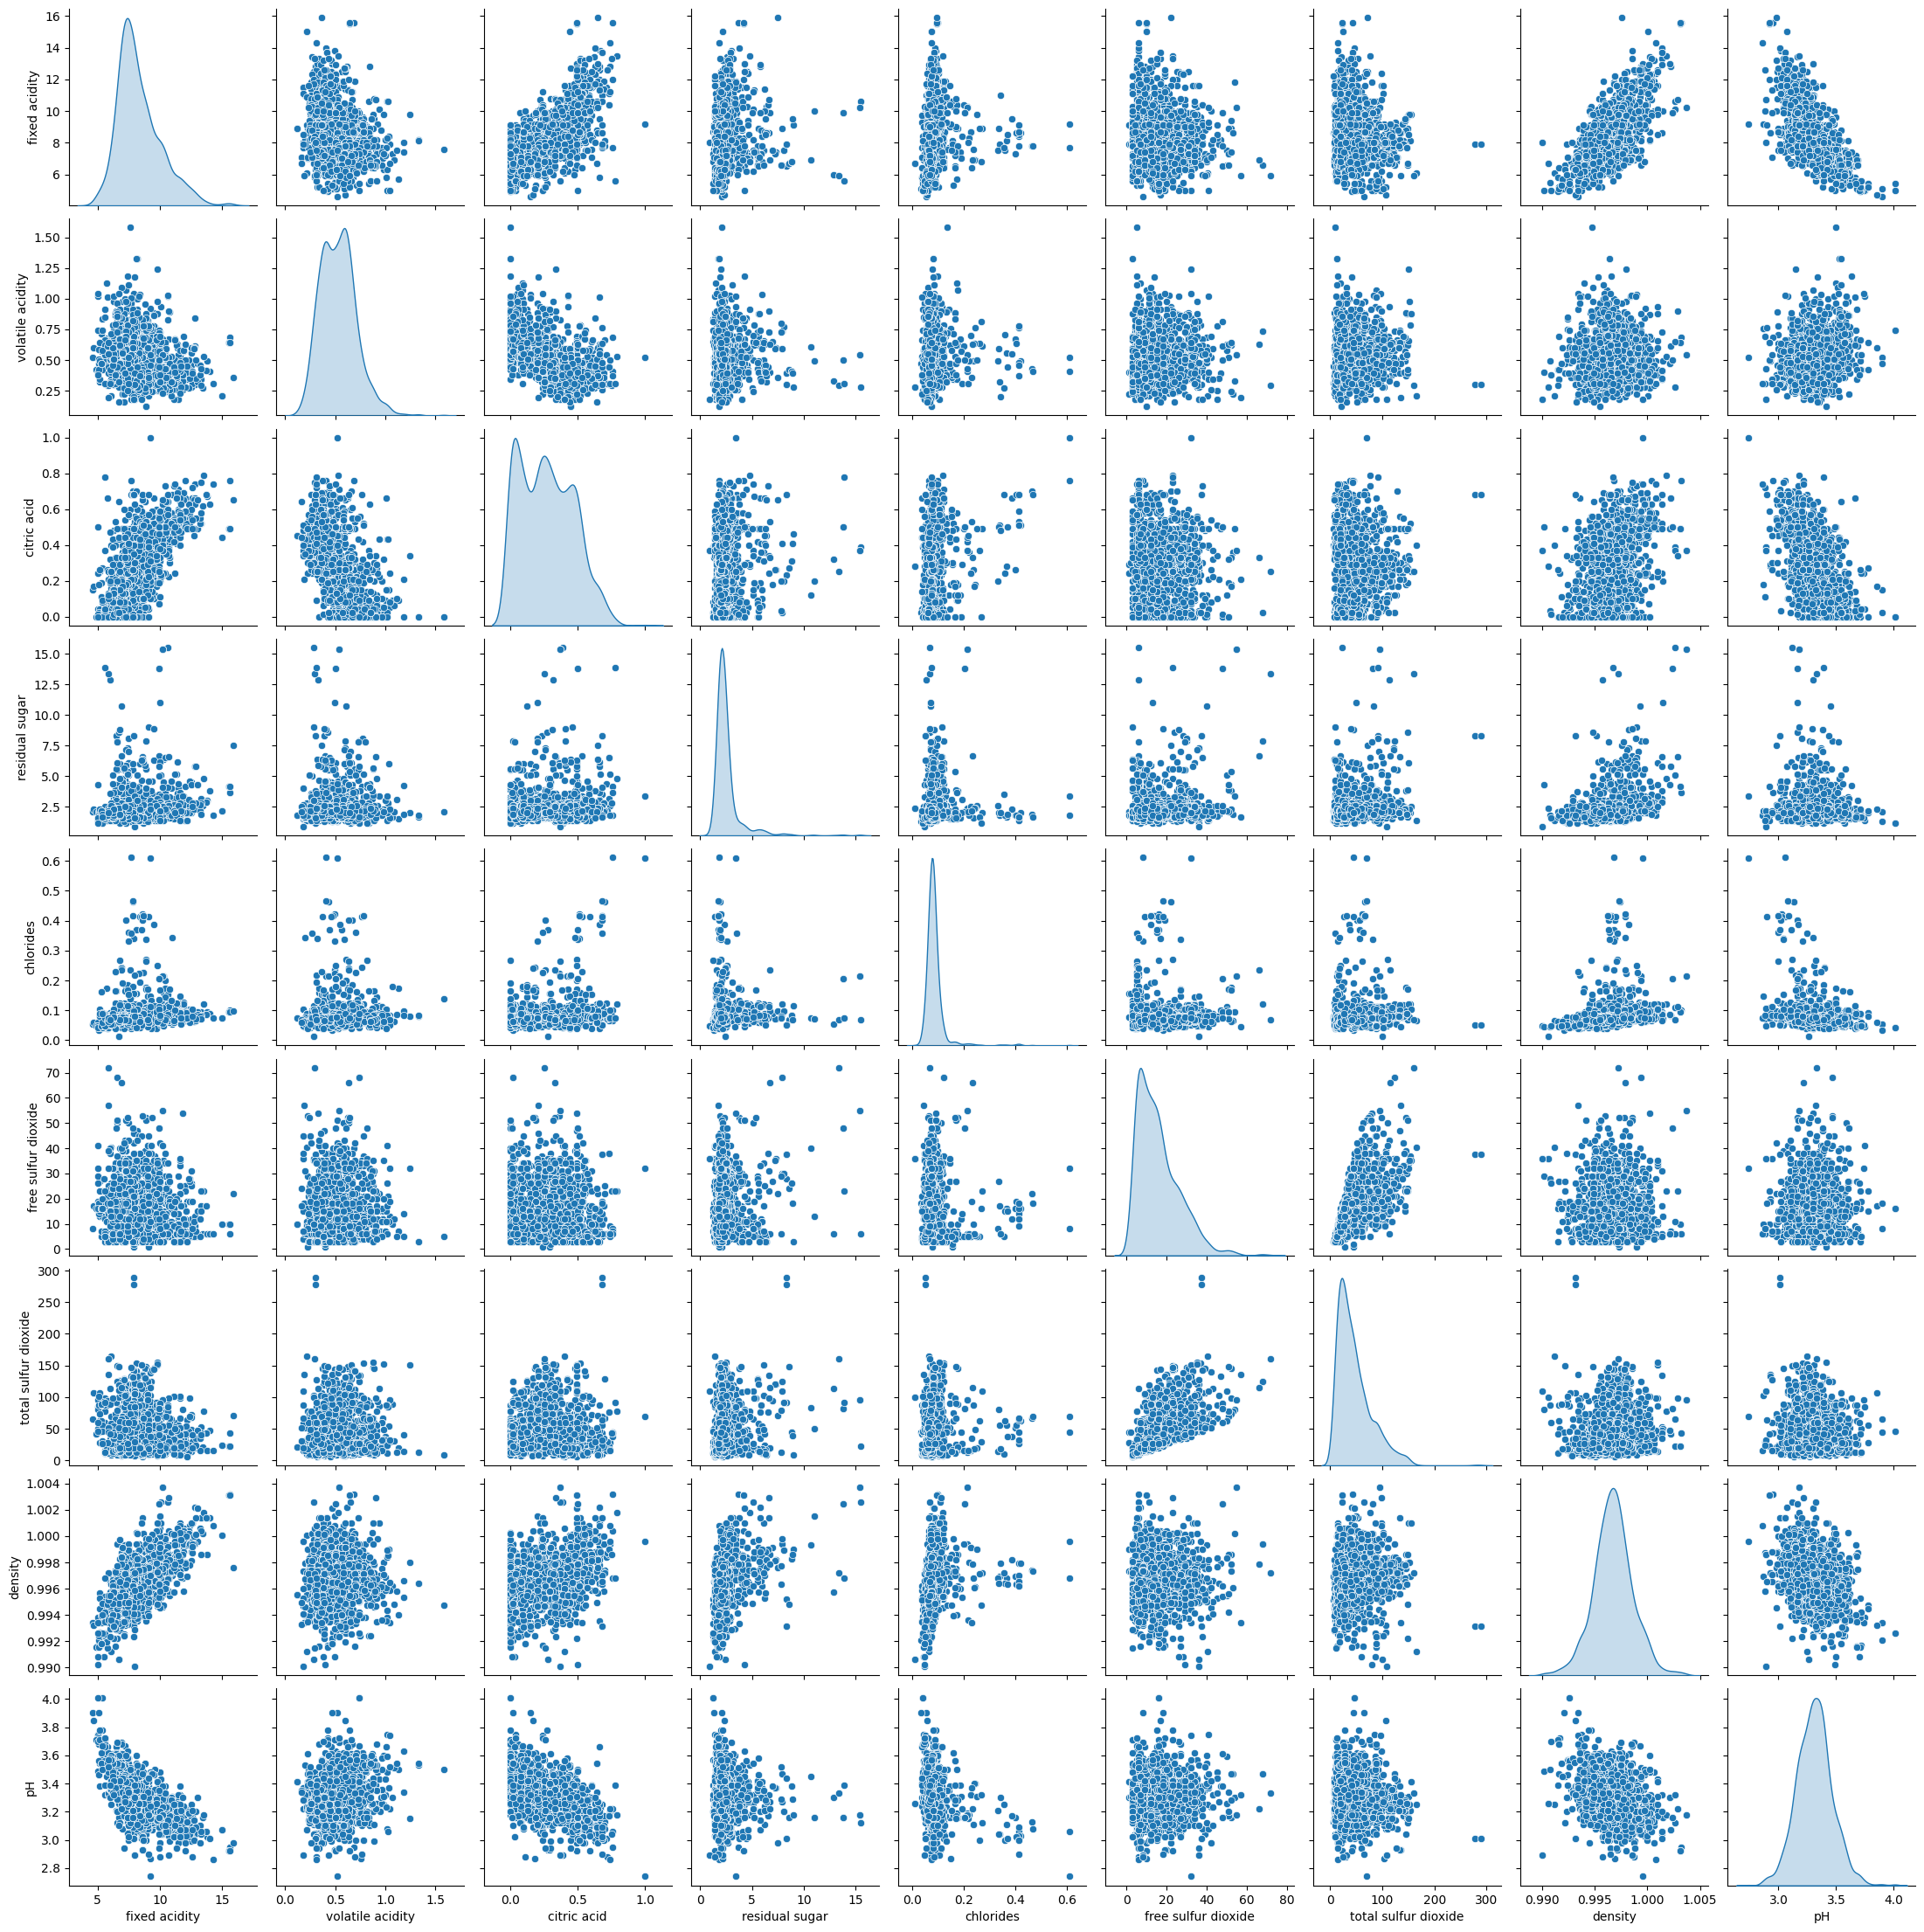

In [51]:
sns.pairplot(red, vars=red.columns[0:9], diag_kind='kde')